# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Warning:** This notebook was automatically generated by an AI and has not been fully verified. Please be cautious when interpreting the code or results. Users are encouraged to review and adapt the code as needed.

## Overview of the Dandiset

This Dandiset contains movies of a pial vessel of mice used in experiments studying the comparison of approaches for surface vessel diameter and pulsatility quantification.

You can find the Dandiset here: https://dandiarchive.org/dandiset/001366/0.250324.1603

## What this notebook will cover

This notebook will demonstrate how to:
- Load Dandiset metadata using the DANDI API.
- Load one of the NWB files from the Dandiset.
- Access basic metadata from the NWB file.
- Visualize sample frames from the movie data within the NWB file.

## Required Packages

This notebook requires the following Python packages:
- `dandi`
- `pynwb`
- `h5py`
- `remfile`
- `matplotlib`
- `numpy`
- `itertools`

## Loading the Dandiset

We can connect to the DANDI archive and get information about the Dandiset using the `dandi` package.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## Loading an NWB file and viewing metadata

This Dandiset contains NWB files with movie data. We will load one of these NWB files and explore its basic structure and metadata.

In [2]:
import pynwb
import h5py
import remfile

# Define the URL for the NWB file
# This URL was obtained using the dandiset-assets command and corresponds to the asset:
# sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (Asset ID: 2f12bce3-f841-46ca-b928-044269122a59)
url = "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic metadata from the NWB file
print(f"NWB Session Description: {nwb.session_description}")
print(f"NWB Identifier: {nwb.identifier}")
print(f"NWB Session Start Time: {nwb.session_start_time}")
print(f"NWB Experimenter: {nwb.experimenter}")
print(f"NWB Session ID: {nwb.session_id}")
print(f"NWB Institution: {nwb.institution}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Subject Species: {nwb.subject.species}")
print(f"Subject Sex: {nwb.subject.sex}")
print(f"Subject Age: {nwb.subject.age}")

NWB Session Description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
NWB Identifier: Qinwen_6th_March_03122024-m4-baseline
NWB Session Start Time: 2024-03-12 01:00:00-04:00
NWB Experimenter: ('Huang, Qinwen',)
NWB Session ID: 03122024-m4-baseline
NWB Institution: University of Rochester
Subject ID: 031224_M4
Subject Species: Mus musculus
Subject Sex: M
Subject Age: P2M


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Contents of the NWB file

Based on the file information, this NWB file (sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb) primarily contains an ImageSeries in the `acquisition` section with the name "Movies".

The `Movies` ImageSeries has the following characteristics:
- **Description:** 16-bit grayscale movie of a pial vessel
- **Rate:** 30.0 Hz
- **Starting Time:** 0.0 seconds
- **Data Shape:** (6000, 512, 512) - This indicates 6000 frames, each with a resolution of 512x512 pixels.
- **Data Type:** uint16

You can explore this NWB file further on Neurosift:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=draft

## Visualizing sample frames from the movie data

We can access the movie data from the `Movies` ImageSeries. Let's visualize a few frames to see the structure of the vessel network.

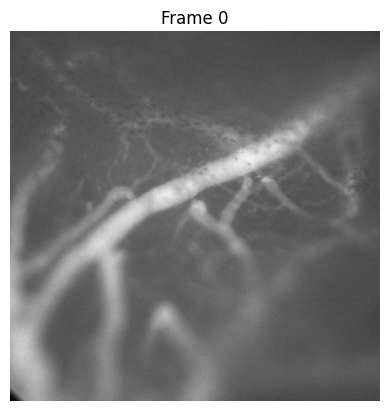

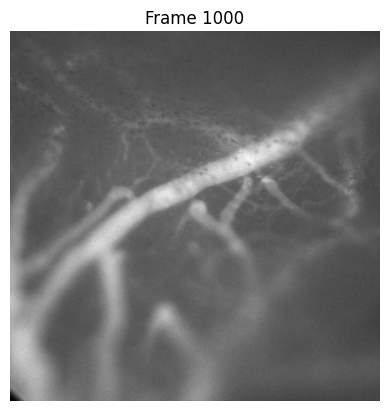

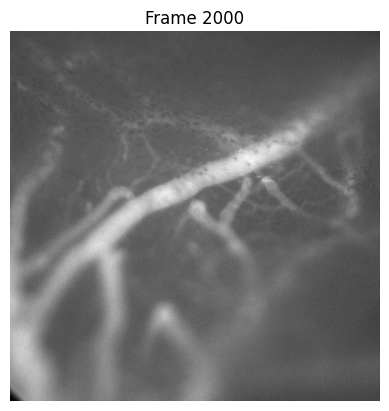

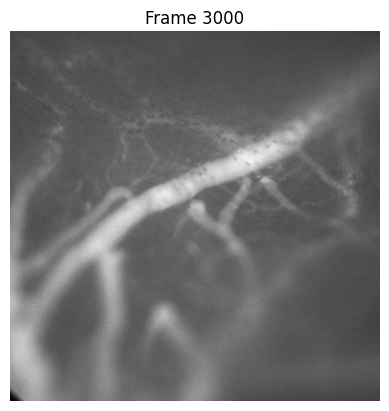

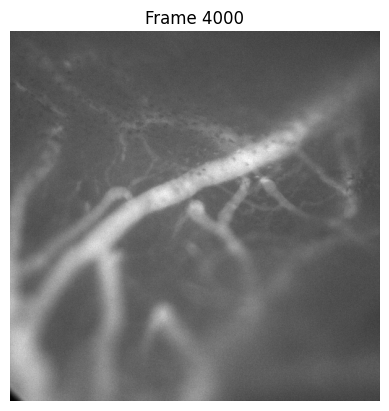

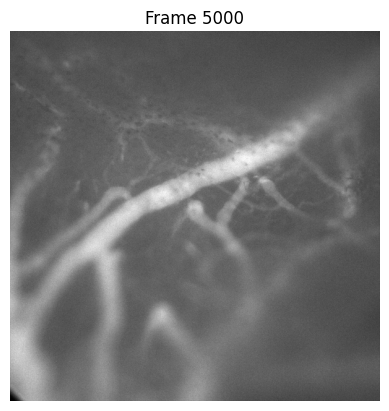

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Access the 'Movies' ImageSeries data
acquisition = nwb.acquisition
Movies = acquisition["Movies"]
movie_data = Movies.data # This is a h5py.Dataset

# Select and plot a few frames
frame_indices = [0, 1000, 2000, 3000, 4000, 5000]

for i, frame_index in enumerate(frame_indices):
    if frame_index < movie_data.shape[0]:
        frame = movie_data[frame_index, :, :]
        plt.figure()
        plt.imshow(frame, cmap='gray')
        plt.title(f'Frame {frame_index}')
        plt.axis('off')
        plt.show() # Use plt.show() in the notebook
    else:
        print(f"Frame index {frame_index} is out of bounds.")

## Exploring pixel intensity over time (Note on performance)

The dataset contains a time series of images, which could be used to analyze dynamics such as vessel pulsatility. Ideally, we would plot metrics like pixel intensity over time for regions of interest within the vessel.

However, loading and processing a significant portion of the time series data directly from the remote NWB file can be computationally intensive and time-consuming when streaming. For larger datasets or more complex analyses, it is often more efficient to download the data locally or use specialized tools optimized for remote data access and processing.

## Summary and Future Directions

This notebook demonstrated how to access basic information and sample frames from the movie data in Dandiset 001366. We were able to visualize the structure of the vessel network in individual frames.

Further analysis could involve:
- Developing more sophisticated methods to track vessel diameter over time within the movie data.
- Analyzing the intensity profiles across vessel cross-sections to quantify pulsatility.
- Comparing analysis results across different NWB files in the Dandiset.

These more advanced analyses may require downloading the NWB files locally or utilizing computing resources with faster data access.

In [4]:
# Close the NWB file
io.close()